<h1 style="text-align:center;">Création de graphiques avec "ggplot2" (partie I)</h1>


<u>**Auteur</u> :** [Younes Dahami](https://www.linkedin.com/in/dahami/)

La librairie `ggplot2` est une puissante librairie de visualisation de données en R, développée par Hadley Wickham. Elle offre une approche basée sur la "grammaire des graphiques", ce qui permet aux utilisateurs de créer des graphiques complexes et esthétiquement plaisants à partir de données tabulaires. `ggplot2` permet de construire des graphiques en couches, où chaque composant du graphique (points, lignes, barres, etc.) est ajouté séparément. Cette approche modulaire rend la création et la personnalisation de graphiques flexibles et intuitives. Avec `ggplot2`, les utilisateurs peuvent aisément ajuster les aspects visuels des graphiques, comme les couleurs, les tailles et les étiquettes, tout en gardant un contrôle précis sur la représentation des données. Cela en fait l'une des librairies les plus utilisées pour la visualisation de données dans le langage R.


In [3]:
library(ggplot2)

# 1) Base R vs. ggplot2

Par défaut, R inclut des systèmes pour construire différents types de graphiques. Tracer des graphiques avec ces fonctions intégrées est appelé l'utilisation de **Base R** dans ces tutoriels. Bien que Base R puisse créer de nombreux types de graphiques intéressants lors de l'analyse de données, ils ne sont souvent pas visuellement raffinés. De plus, personnaliser notre graphique en utilisant Base R peut être un processus complexe. Le package **ggplot2** crée un système de tracé séparé qui donne généralement des graphiques visuellement plaisants avec des fonctionnalités de personnalisation étendues et faciles à utiliser. Ainsi, dans ces tutoriels, le traçage avec ggplot est abordé et les fonctions Base R pour le traçage sont discutées de façon maigre.

# 2) ggplot2

## 2.1) Introduction

`ggplot2` est un package pour R et doit être téléchargé et installé une fois, puis chargé à chaque fois qu'on utilise R. Comme [dplyr](https://github.com/Dahamey/R/blob/main/R%20%20-%20Fr/dplyr%20en%20R.ipynb) discuté auparavant, `ggplot2` est un ensemble de nouvelles fonctions qui étendent les capacités de R ainsi qu'un opérateur qui nous permet de connecter ces fonctions ensemble pour créer un code très concis. Dans `dplyr`, cet opérateur était le pipe `%>%` et dans `ggplot`, cet opérateur est `+`.

Le principe directeur derrière `ggplot2` est qu'on construit notre graphique à partir de ses composants fondamentaux (quel ensemble de données on utilise, un modèle, etc.) à ses composants plus spécifiques (titre, légende, etc.) et connecte ces composants ensemble en utilisant `+`. On pourrait considérer cela comme **différentes couches placées sur le même espace** qui, lorsqu'elles sont placées les unes sur les autres, composent notre graphique. La structure générale de notre code ggplot est la suivante :

**<center>ggplot(…) + aesthetic(…) + …</center>**

où :

* **la fonction ggplot() :** est l'endroit où on peut spécifier l'ensemble de données, les variables (axe des x et axe des y), les regroupements, les couleurs, etc. à utiliser pour toutes les couches pertinentes dans le graphique.

* **L'argument aesthetic(...) :** est remplacé par le nom de la fonction correspondant à la manière générale dont on souhaite que nos données soient affichées. Certains exemples incluent un nuage de points, une ligne(s) lissée(s) de meilleur ajustement, une boite à moustaches, etc. où chacun de ces types a sa propre fonction qu'on appellera à la place de aesthetic(...). Dans les arguments de cette fonction, on spécifiera les paramètres spécifiques à cette esthétique/couche (ensemble de données, variables x et y, regroupements, etc.). Ainsi, **les arguments de ggplot() peuvent également être laissés vides.**

Passons en revue quelques exemples simples pour illustrer ces deux concepts.

### Nuage de points (scatterplot)

En utilisant les données AOSI, créons d'abord un **nuage de points** du score total AOSI à la visite de 12 mois par rapport au score total AOSI à la visite de 6 mois. La fonction qui affiche les données sous forme de nuage de points s'appelle **geom_point()** :

Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


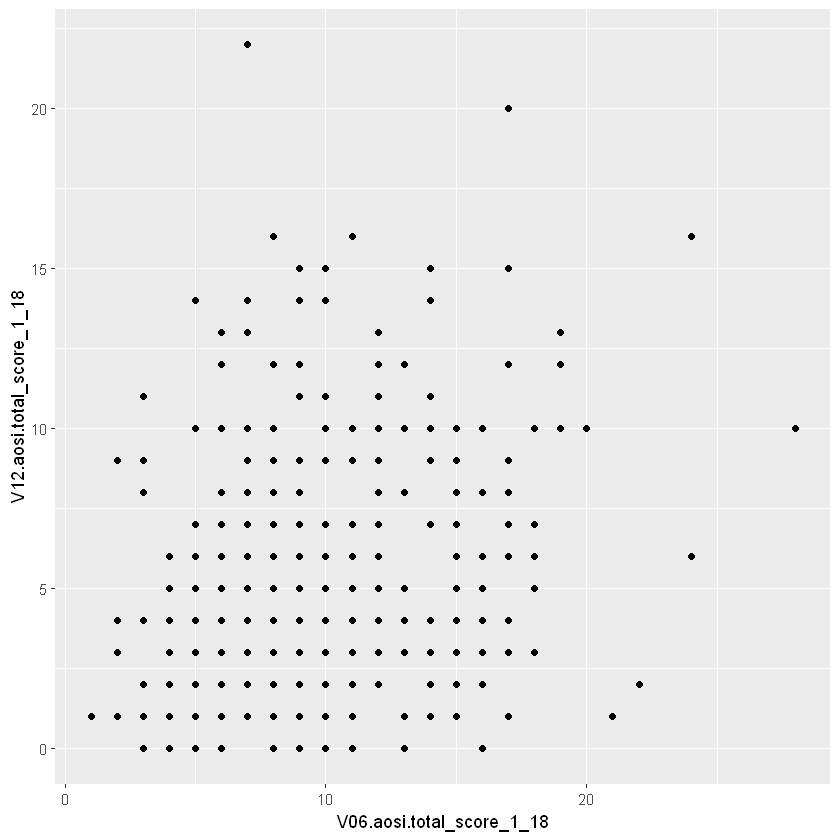

In [4]:
data_aosi <- read.csv("cross-sec_aosi.csv", stringsAsFactors = FALSE, na.strings = ".")

ggplot(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18)) +
    geom_point()

Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


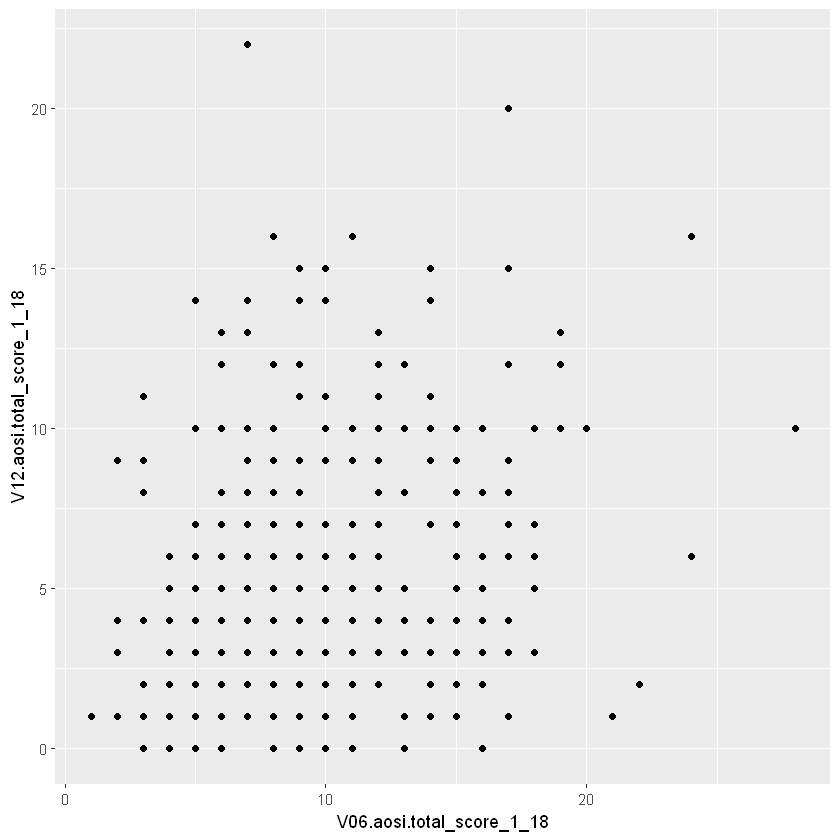

In [5]:
ggplot()+
    geom_point(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18))

même résultat produit, on peut spécifier les paramètres du graphique en général pour toutes les couches (1er exemple) ou pour la couche spécifique d'intérêt. Puisque on n'a qu'une seule couche, les deux façons créent le même graphique.


Remarquons l'utilisation de `aes(x=…, y=…)` et non seulement `x=…, y=…`. Lorsqu'on spécifie les variables de l'ensemble de données comme valeurs pour nos paramètres de tracé, on doit entourer ces arguments de `aes()` afin que ggplot2 sache que ces noms font référence aux noms de variables de l'ensemble de données. Notez également comment la spécification des valeurs des paramètres de tracé à l'intérieur de ggplot() et à l'intérieur de geom_point() a donné le même graphique. On peut spécifier les paramètres de tracé en général pour toutes les couches (à l'intérieur de `ggplot()`) ou pour la couche spécifique d'intérêt (dans ce cas, à l'intérieur de `geom_point()`). Puisqu'on a qu'une seule couche, les deux façons créent le même graphique.


# 3) Esthétiques ggplot

Un nuage de points avec `geom_point()` n'est qu'un exemple des esthétiques disponibles avec `ggplot`. Passons en revue quelques autres qu'on utilisera probablement lors de l'analyse des données IBIS. On verra que bon nombre des options de personnalisation discutées sont disponibles pour toutes ces esthétiques, mais qu'elles ont des effets différents selon les esthétiques.

## 3.1) Nuage de points

On a déjà introduit le nuage de points, alors plongeons dans la personnalisation. Supposons qu'on souhaite colorer les points avec autre chose que le noir, utilisons le bleu :


Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


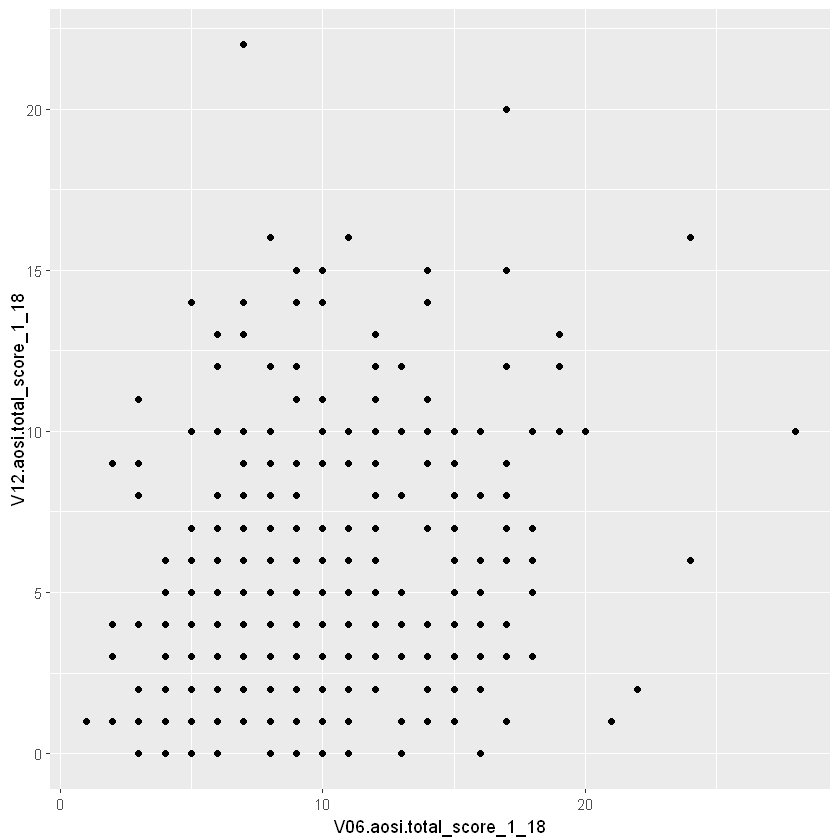

In [6]:
ggplot(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18), color = "blue")+
    geom_point()

Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


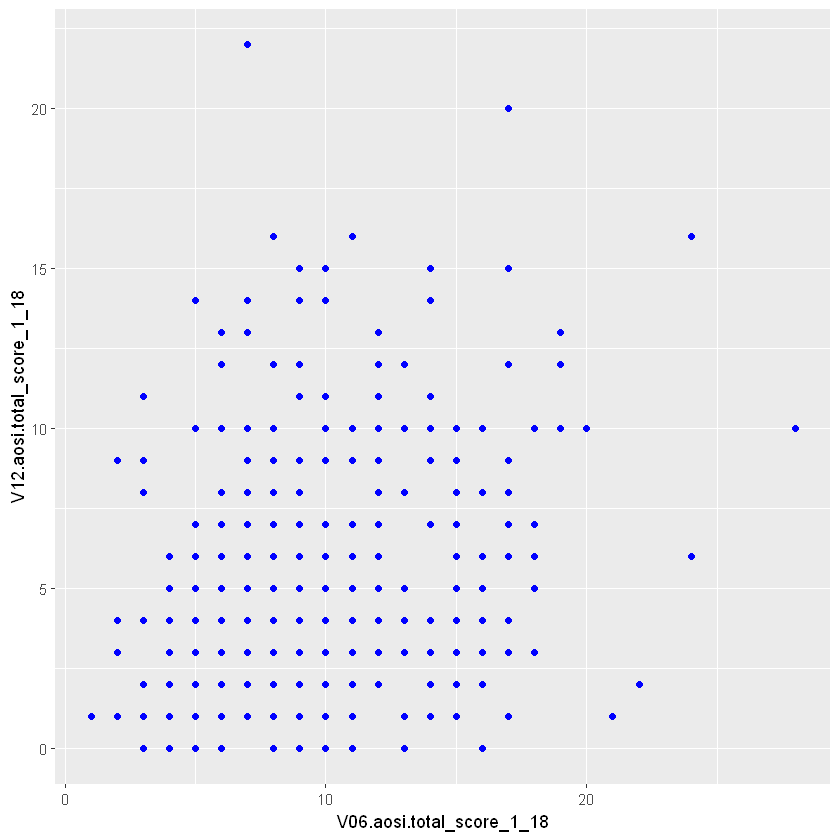

In [7]:
# ne fonctionne pas, toujours noir. Pourquoi ?

ggplot()+
  geom_point(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18), color = "blue")

* Tout d'abord, remarquons que puisque "blue" ne fait pas référence à une variable dans l'ensemble de données AOSI, ce paramètre de tracé est placé **en dehors** de `aes()`.

* De plus, remarquons que placer `color="blue"` dans `ggplot()` n'a pas fonctionné tandis que le placer à l'intérieur de l'esthétique `geom_point()` l'a fait. Cela est dû au fait que la fonction **`ggplot` n'accepte que des arguments de la forme `data=` et `aes(...)`.** Les valeurs des paramètres qui ne font pas référence à des variables dans l'ensemble de données ne peuvent pas être placées dans `ggplot()` et doivent être placées dans la ou les couches spécifiques d'intérêt.

Supposons plutôt que nous voulions colorer les points en fonction de la valeur d'une autre variable dans l'ensemble de données telle que le diagnostic ADS. Pour ce faire, nous suivons la structure discutée ci-dessus avec le code suivant :


Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


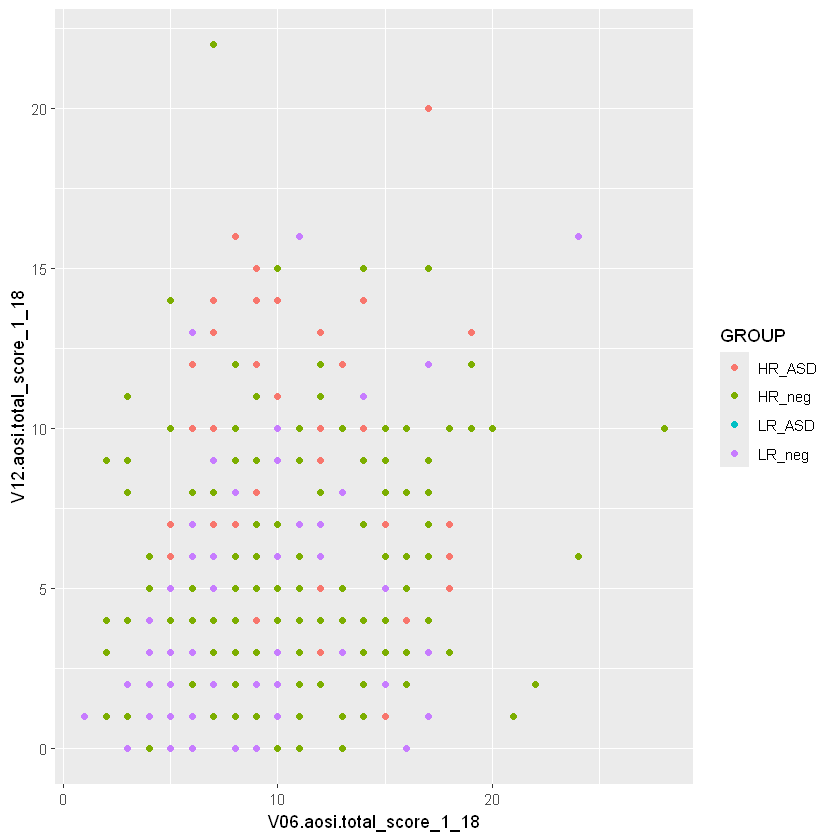

In [8]:
ggplot(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18, color = GROUP ))+
    geom_point()

Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


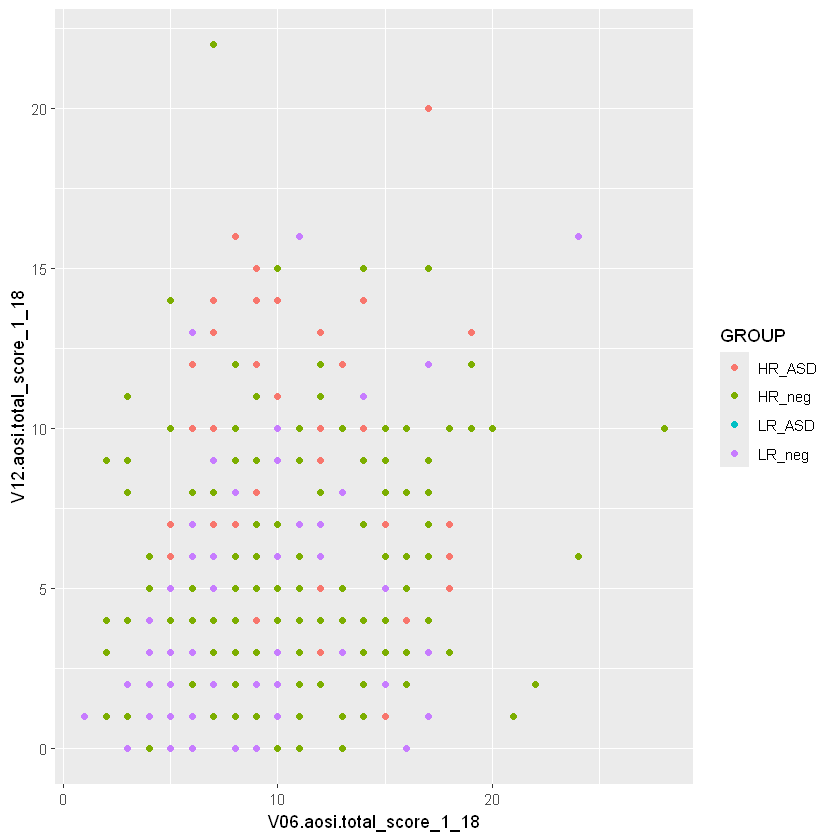

In [9]:
ggplot()+
    geom_point(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18, color = GROUP))

Remarquons comment les deux commandes créent le même graphique. Pourquoi ? (référons-nous à l'explication précédente avec "blue"). Remarquons également qu'une légende est automatiquement créée. Cette légende peut être fortement personnalisée, ce qui est discuté plus tard dans ce notebook.

On peut spécifier plus de paramètres de tracé dans cet exemple simple, tels que la taille, la forme et bien d'autres. On couvrira la taille et la forme, mais pour toutes les esthétiques, on doit consulter la documentation de la fonction de cette esthétique (par exemple, `geom_point()`) et expérimenter. La taille et la forme fonctionnent de manière similaire à la couleur, on peut spécifier des valeurs fixes pour tous les points ou faire varier les valeurs en fonction d'une autre variable. On peut également spécifier n'importe quelle combinaison de ces paramètres de tracé dans notre code.


Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


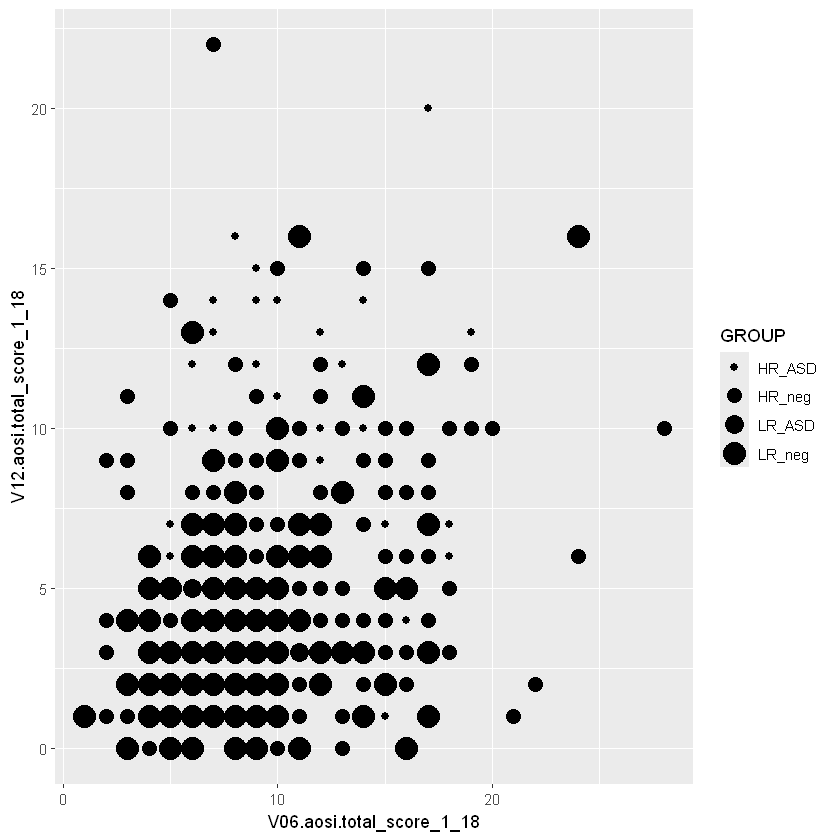

In [10]:
# uniquement la taille 
ggplot(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18, size = GROUP))+
    geom_point()

Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


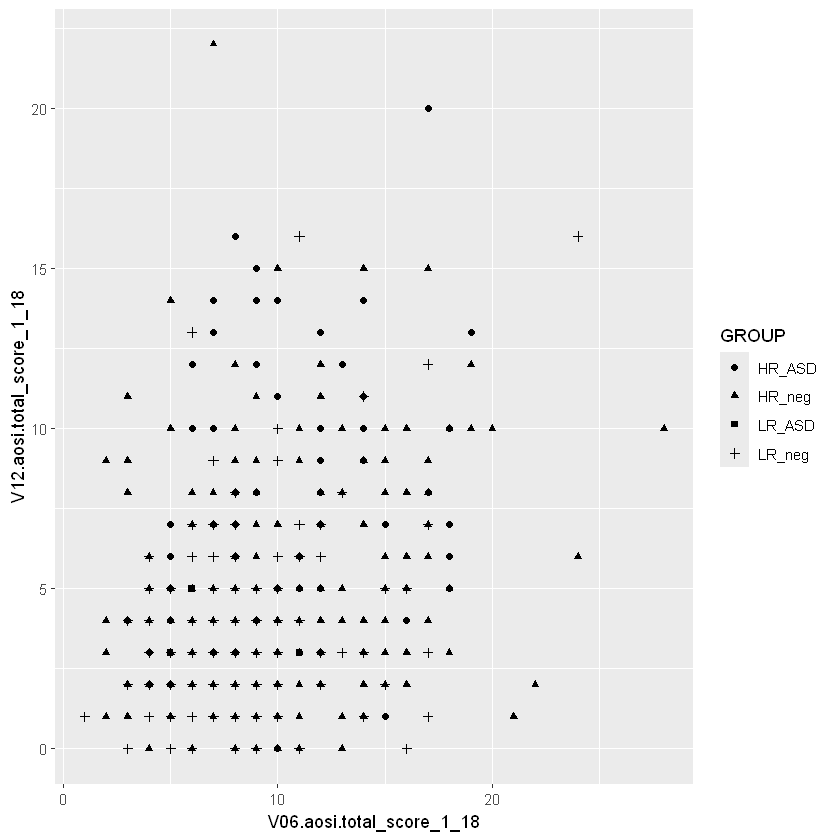

In [11]:
# uniquement la forme
ggplot()+
    geom_point(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18, shape = GROUP))

Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


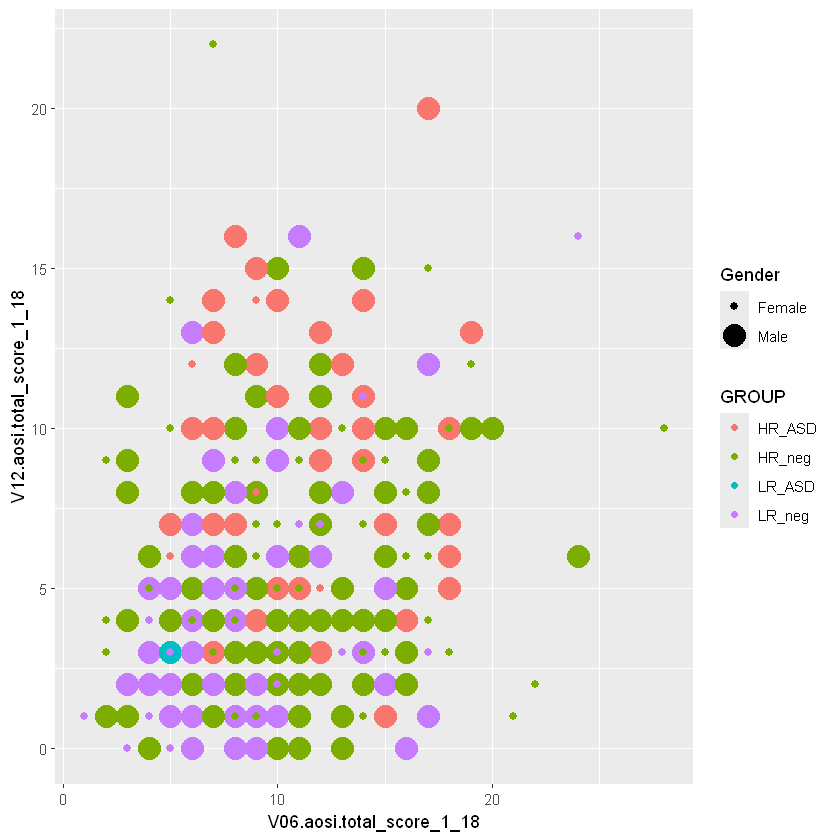

In [12]:
# Taille et couleur
ggplot()+
    geom_point(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18, color = GROUP, size = Gender))

Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


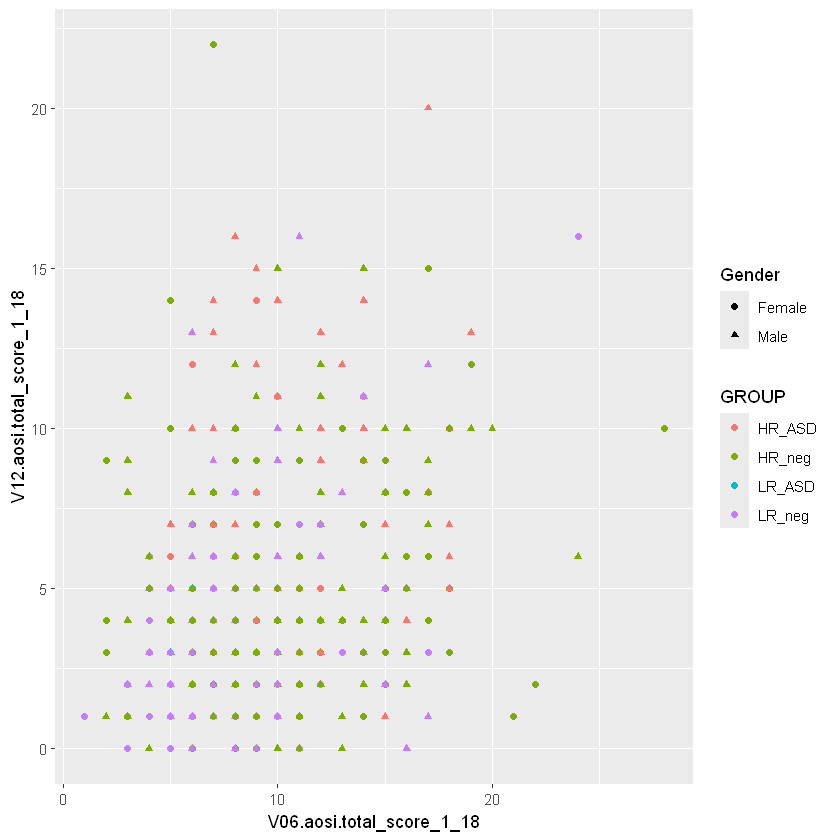

In [13]:
# couleur et format
ggplot()+
    geom_point(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18, shape = Gender,color = GROUP))

Les exemples ci-dessus font tous varier la taille et la forme avec une variable, mais on peut également utiliser des valeurs fixes comme ce qui a été fait pour la couleur. On utilise des nombres pour faire référence à différentes tailles et formes, pour une vue d'ensemble complète de tous les différents paramètres de tracé qu'on peut définir **pour chaque esthétique** et les valeurs correspondant à chaque visuel, consultez [la page de documentation suivante de ggplot2](https://ggplot2.tidyverse.org/articles/ggplot2-specs.html#point).

## 3.2) Couleurs en R

Suite à l'exemple précédent, on peut discuter de la manière de faire référence aux couleurs en R. En particulier, R doit comprendre que lorsque l'on spécifie "blue" dans le paramètre de couleur, on fait référence à une couleur et non simplement à une chaîne de lettres. Les couleurs en R sont en fait référencées par des chaînes spéciales de quelques lettres et chiffres que R traduit pour représenter une couleur spécifique dans sa bibliothèque de couleurs. Par défaut, R a un ensemble de couleurs qu'il peut afficher avec des codes correspondants. Par exemple, la chaîne "#0000FF" est reconnue par R comme du bleu foncé. Cette bibliothèque de couleurs peut être étendue (voir le package **ColorBrewer**), mais généralement l'ensemble par défaut est suffisant. Dans de nombreuses fonctions, comme `ggplot()`, on peut spécifier une couleur en utilisant son nom anglais en tant que chaîne (comme cela a été fait dans l'exemple ci-dessus avec "blue") car il est supposé que l'on ne spécifierait qu'une couleur spécifique et non simplement le mot "blue". On n'aura peut-être jamais besoin d'utiliser les codes de couleur réels, mais si l'on remarque une erreur lors de la spécification d'une couleur, on peut essayer de remplacer son nom dans le code de la fonction par le code couleur correspondant. Les noms et codes des couleurs spécifiques peuvent être facilement trouvés en ligne via une recherche Google.


### 3.3) Ligne de tendance (Line of best fit)

Il est souvent intéressant de visualiser nos données à l'aide d'une ligne de tendance (**best fit line**) ou d'un autre "lisseur" (**smoother**) afin d'illustrer plus clairement les modèles entre des variables spécifiques. Cela peut être fait à l'aide de **`geom_smooth()`**. Ses arguments sont structurés de la même manière qu'avec **`geom_point()`**, y compris l'utilisation de `aes()`. Notons que cette structure est la même pour toutes les esthétiques, bien que certains paramètres soient exclusifs à des esthétiques spécifiques en raison de leurs différences inhérentes dans la visualisation des données d'intérêt. Notons que différentes méthodes de lissage peuvent être spécifiées. Les deux plus courantes sont un **lisseur linéaire** (ligne de meilleure ajustement/régression) et l'utilisation de **LOESS** (un lisseur non linéaire), mais il en existe d'autres qui peuvent être spécifiées. Utilisons l'exemple du score total AOSI montré précédemment, mais traçons une ligne lissée construite à partir des données au lieu d'un nuage de points.


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 161 rows containing non-finite outside the scale range (`stat_smooth()`)."


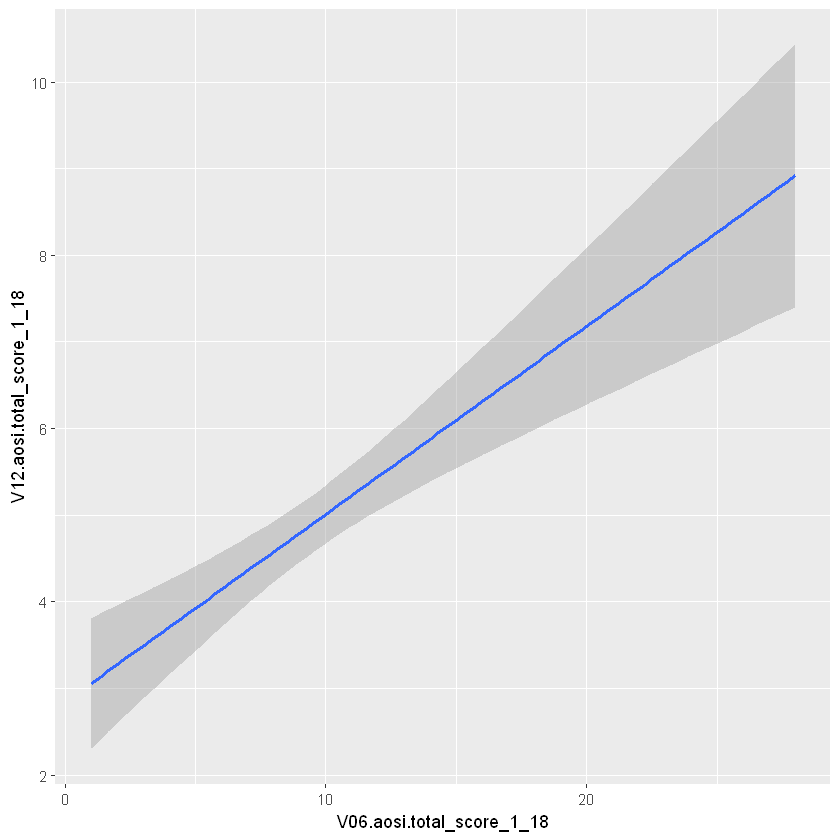

In [14]:
ggplot(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18))+
    geom_smooth(method = "lm")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 161 rows containing non-finite outside the scale range (`stat_smooth()`)."


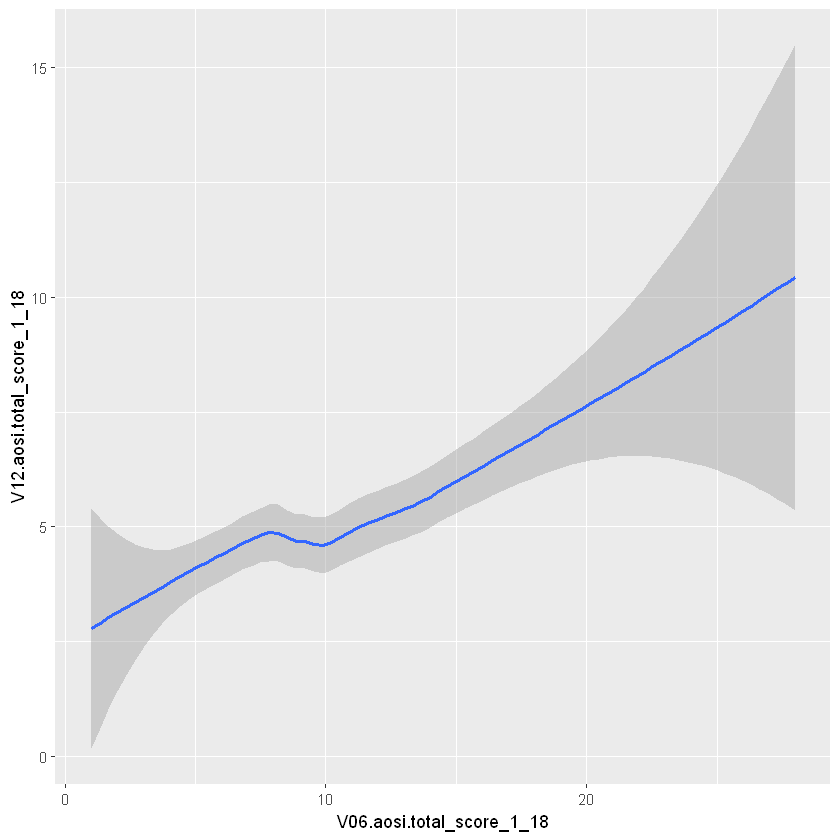

In [15]:
# LOESS est la méthode par défaut et sera automatiquement utilisée si la méthode n'est pas spécifiée
ggplot(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18))+
    geom_smooth(method = "loess")


Remarquons que les barres d'erreur pour le lissage sont également fournies par défaut, ce qui est reflété par l'ombrage gris autour de la ligne. Elles peuvent également être désactivées (ajoutez l'argument `se=FALSE` à `geom_smooth()`).

Bien que cette visualisation soit agréable, nous voulons souvent un nuage de points et une ligne de régression sur le même graphique. Cela peut être fait avec `ggplot` en rappelant sa structure en couches lors de la création du graphique. Imaginons le nuage de points comme une couche et le tracé de la ligne lissée comme une autre couche, nous souhaitons les coller ensemble avec la ligne lissée au-dessus. Cela se fait en utilisant l'opérateur `+`, comme indiqué ci-dessous. Notons que les barres d'erreur grises dans la ligne lissée ont une certaine transparence (qui peut également être ajustée), de sorte que les points du nuage de points seront toujours visibles.


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 161 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


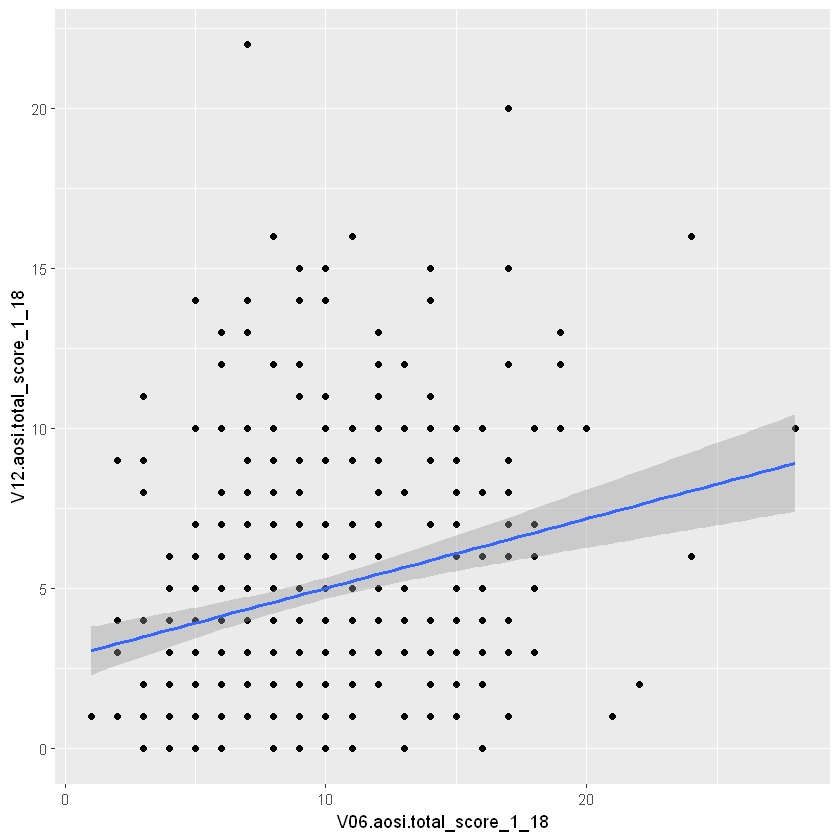

In [16]:
ggplot(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18))+
    geom_point()+
    geom_smooth(method = "lm")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 161 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


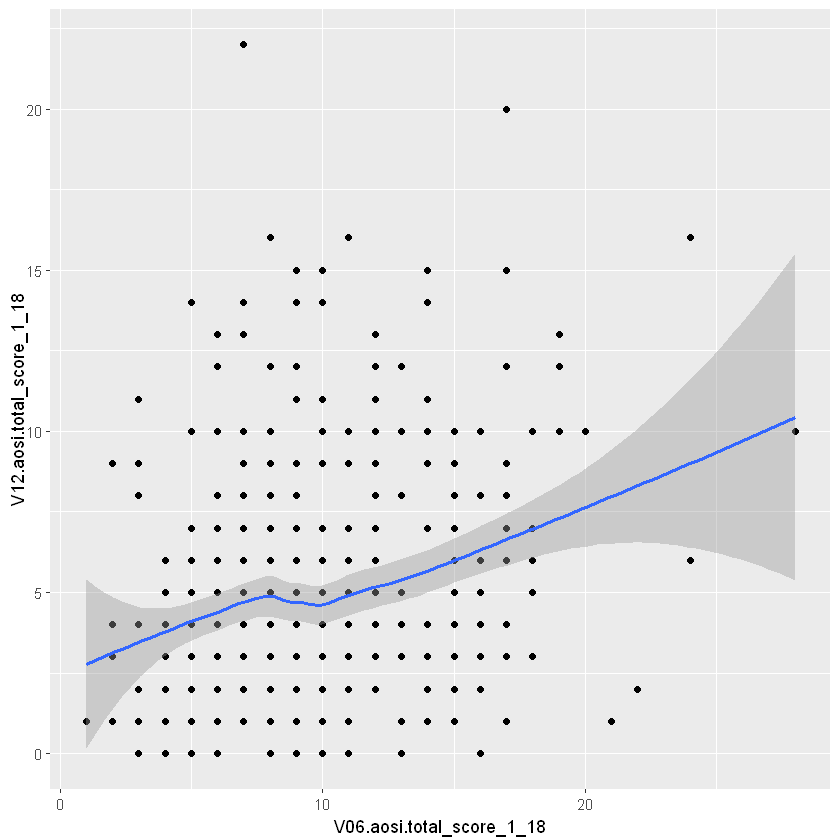

In [17]:
ggplot(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18))+
  geom_point()+
  geom_smooth(method = "loess")

Que se passe-t-il lorsque l'on inverse l'ordre des couches dans le code ? Cette idée de superposition des couches et de construction du graphique composant par composant forme l'ossature de la fonctionnalité de `ggplot`. Nous verrons cela plus en détail lorsque nous aborderons les titres, les sous-titres, etc.

Les paramètres de traçage pour `geom_smooth` incluent la couleur et la taille comme précédemment, ainsi que la méthode comme indiqué dans l'exemple ci-dessus. Quelques autres paramètres pratiques sont **linetype** et **group** : `linetype` nous permet de changer l'esthétique de la ligne de tendance lissée et `group` nous permet de créer une ligne de tendance distincte pour chaque valeur d'une variable choisie. Voir ci-dessous pour un exemple d'utilisation de `group` :


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 161 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


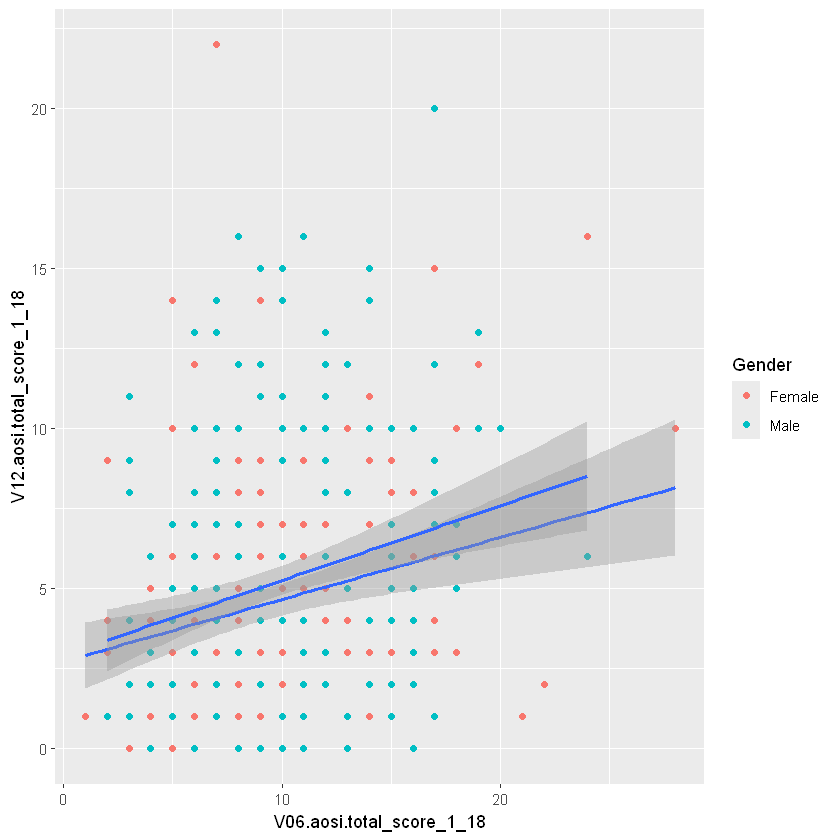

In [18]:
ggplot(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18))+
    geom_point(aes(color = Gender))+
    geom_smooth(method = "lm", aes(group = Gender))

Remarquez que la couleur de la ligne de meilleure ajustement n'a pas changé avec les groupes, pourquoi ?


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 161 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


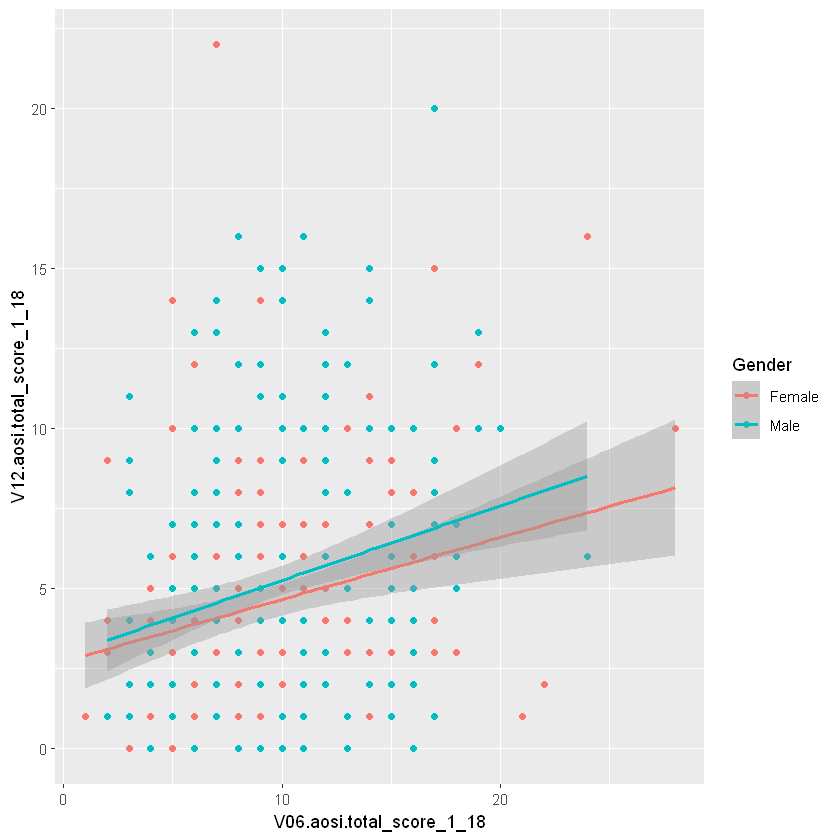

In [19]:
ggplot(data = data_aosi, aes(x = V06.aosi.total_score_1_18, y = V12.aosi.total_score_1_18))+
    geom_point(aes(color = Gender))+
    geom_smooth(method = "lm", aes(group = Gender, color = Gender))

Ce qui est bien plus clair !

## 3.4) Boite et moustache (Box and whisker)

Alors que les exemples ci-dessus sont des esthétiques qui changent simplement la façon dont les données brutes sont affichées, maintenant nous considérons des esthétiques qui représentent les données différemment en appliquant une transformation statistique. Un exemple est une boite à moustaches, ou juste un diagramme en boite, qui calcule une estimation de la distribution des données (médiane, percentiles, etc.) et visualise ensuite cette distribution.

Un diagramme en boite peut être créé en utilisant la fonction **`geom_boxplot()`**. Considérons l'exemple suivant de diagramme en boite visualisant la distribution du score total de l'AOSI à 12 mois pour chaque groupe de diagnostic de ASD :


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


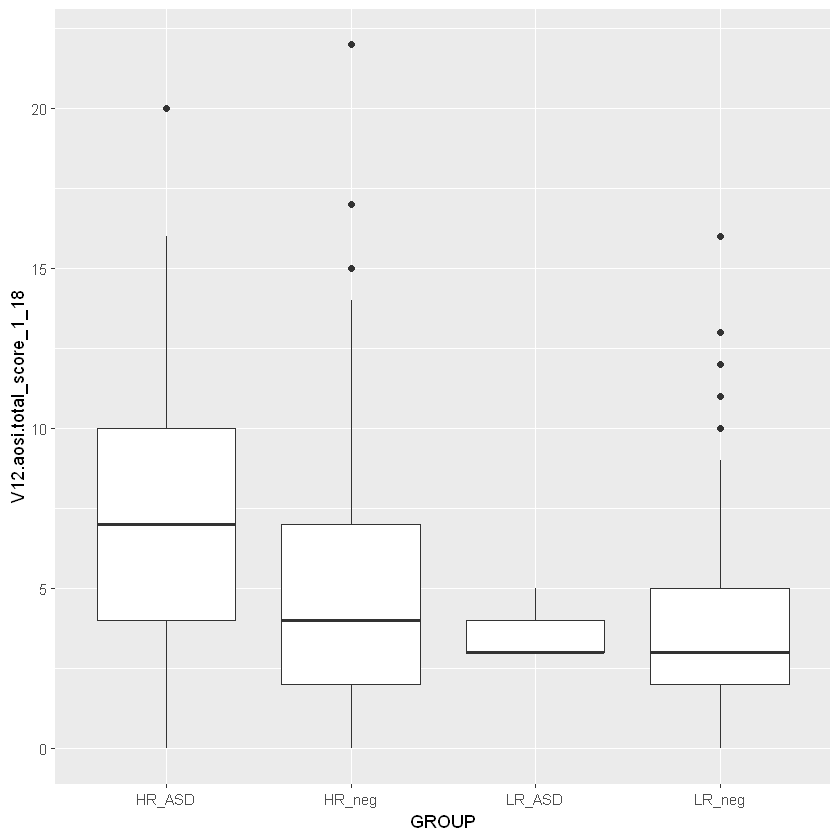

In [20]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18))+
    geom_boxplot()

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


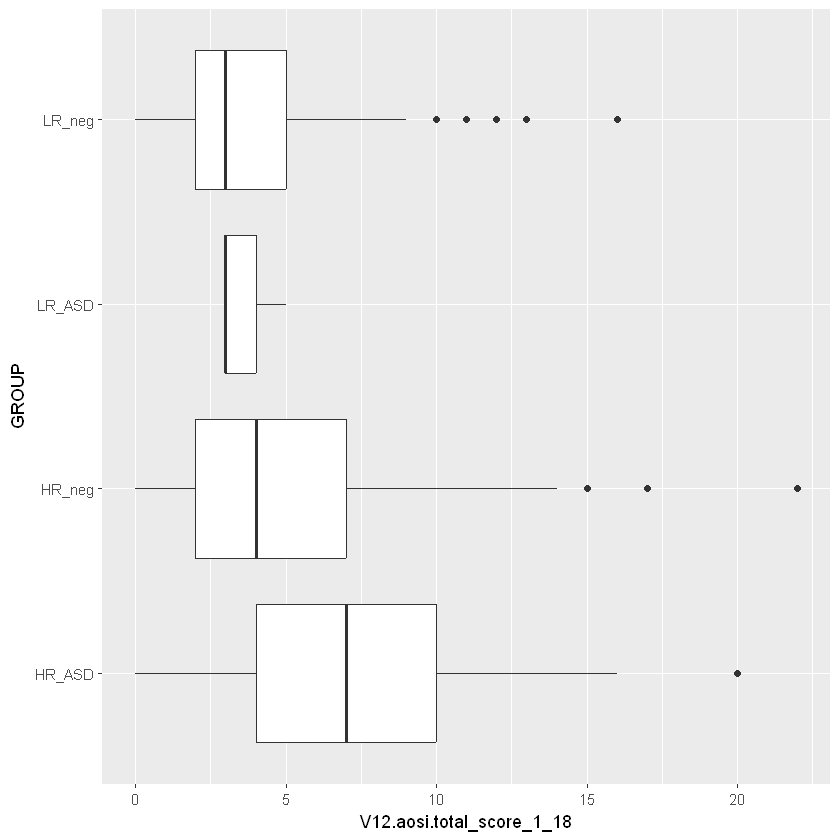

In [21]:
ggplot(data = data_aosi, aes(y = GROUP,x = V12.aosi.total_score_1_18))+
    geom_boxplot()

Il faut expérimenter avec tous les différents paramètres disponibles pour chaque esthétique et voir comment le graphique résultant change.

Ici, on colore également les boites en fonction du groupe de diagnostic de ASD pour les mettre en évidence dans le graphique. Remarquons que la couleur change uniquement le contour et les lignes du diagramme en boite, tandis que fill change l'espace blanc du diagramme en boite. Que se passe-t-il si vous spécifiez les deux dans le même graphique ?

Nous pouvons également utiliser le paramètre `color`/`fill` ici pour avoir une variable supplémentaire utilisée pour regrouper les données. On n'utilise pas les paramètres de tracé de groupe avec boxplot (voir exemple ci-dessous).


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


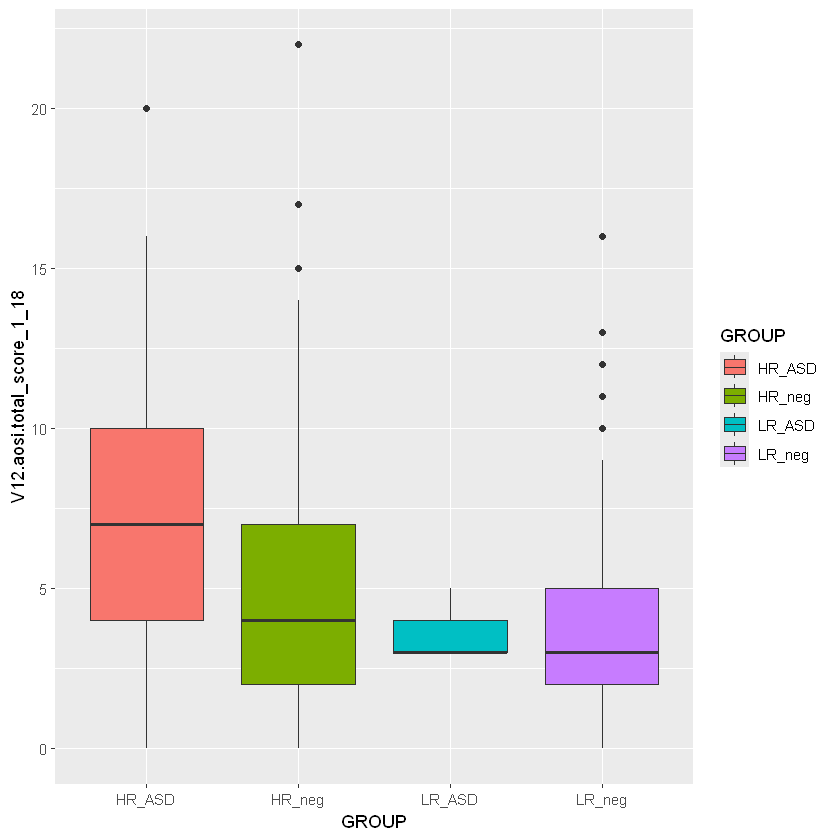

In [22]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = GROUP))+
    geom_boxplot()

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


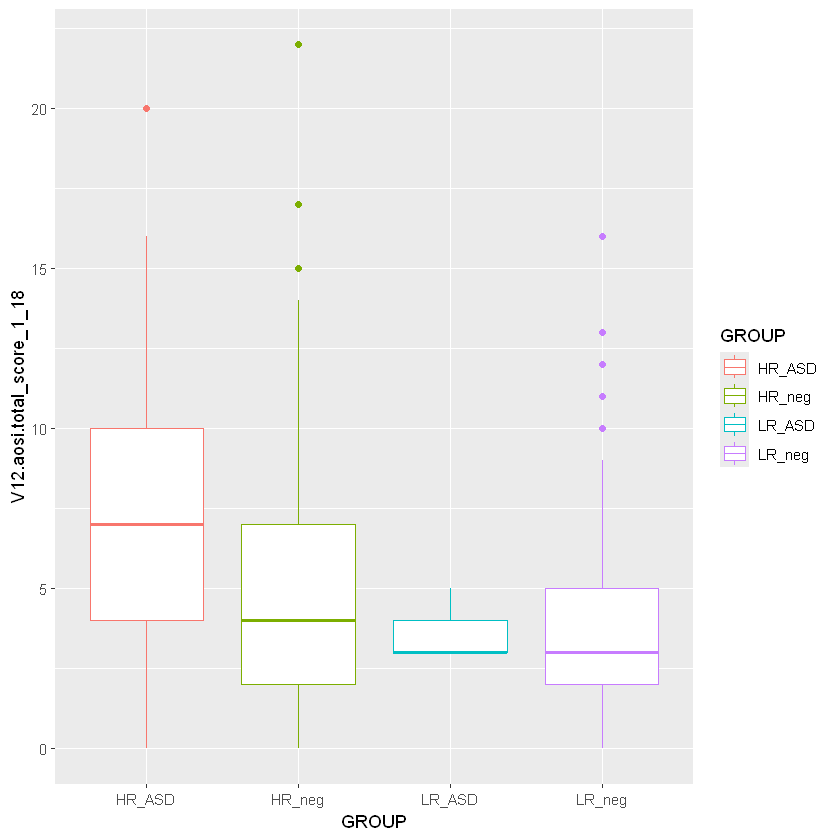

In [23]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, color = GROUP))+
    geom_boxplot()

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


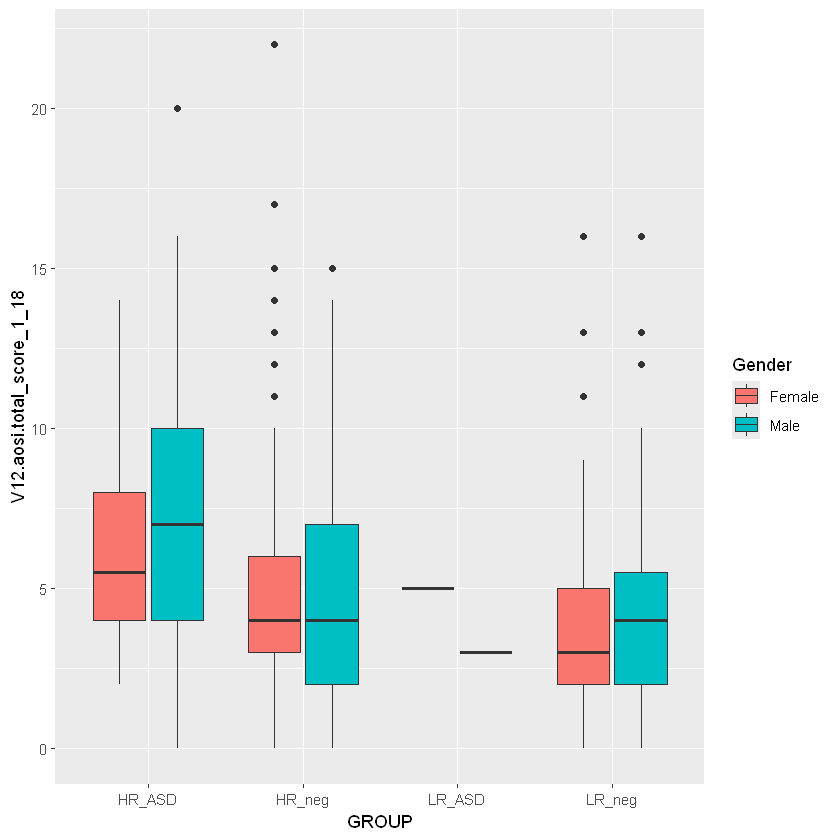

In [24]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


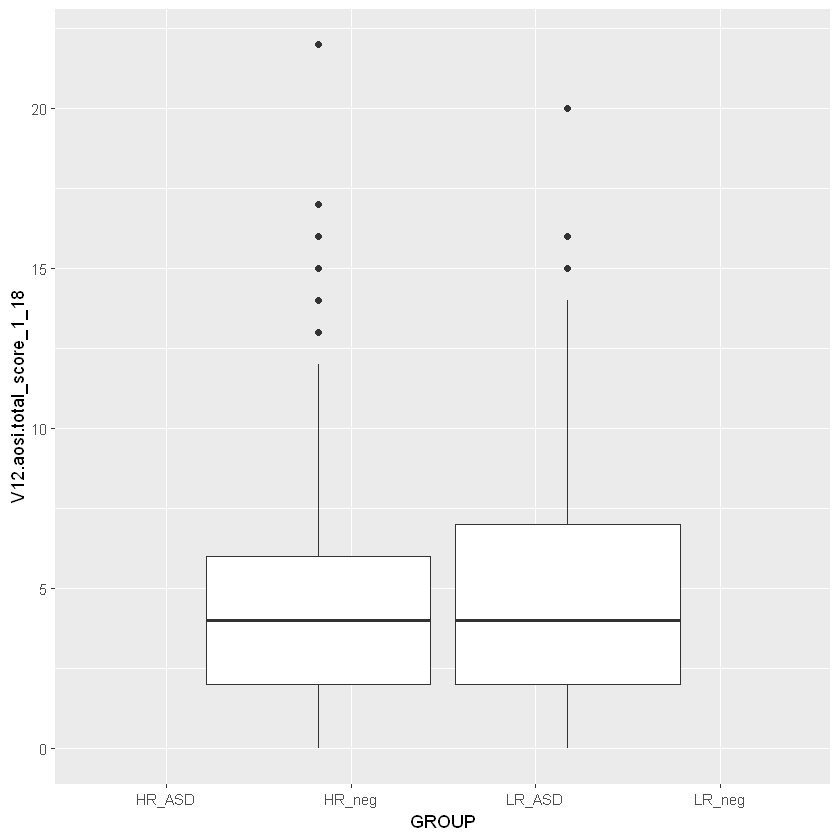

In [25]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, group = Gender))+
    geom_boxplot()

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


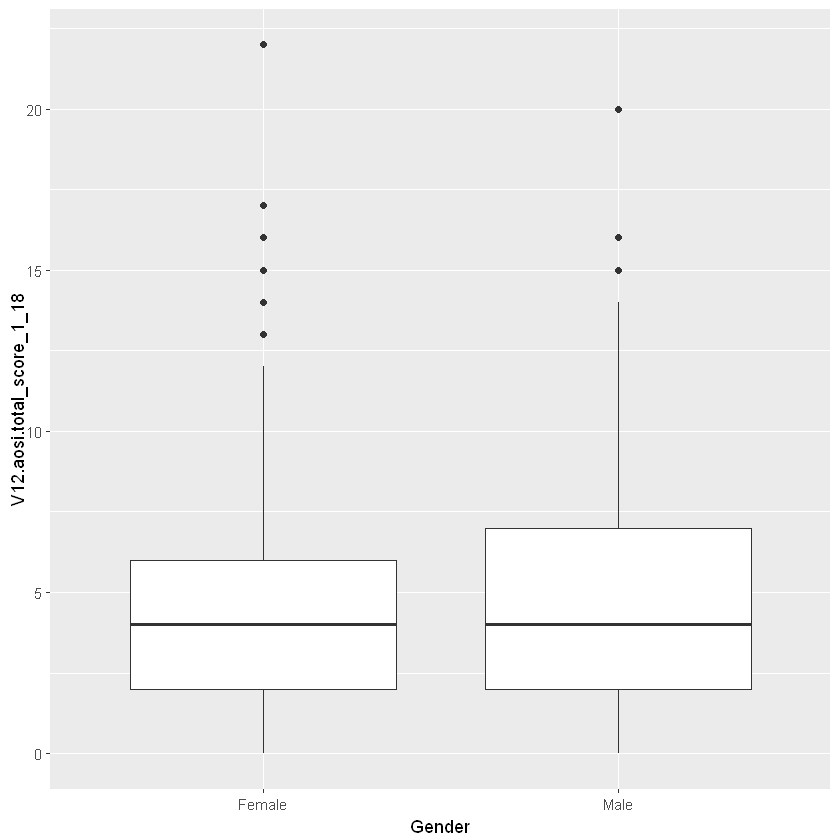

In [26]:
ggplot(data = data_aosi, aes(x = Gender, y = V12.aosi.total_score_1_18, group = Gender))+
    geom_boxplot()

Remarquez que ces 2 derniers graphiques sont les mêmes, en utilisant `group=Gender` avec `x=GROUP` dans le 5ème exemple a causé à `Gender` de remplacer `x=GROUP` lors du calcul des boites à moustaches, mais en raison de `x=GROUP`, l'axe x était étiqueté par `GROUP` et non par `Gender`.

## 3.5) Diagramme à barres (Barchart)

Supposons qu'on veuille créer un diagramme à barres avec des **comptages de fréquence pour une variable catégorielle**. Encore une fois, les données doivent être transformées, cette fois-ci en un ensemble de données des comptages de fréquence et/ou pourcentages, puis visualisées. L'esthétique **`geom_bar()`** crée un diagramme à barres. Voyeons un exemple ci-dessous avec le diagnostic de ASD :


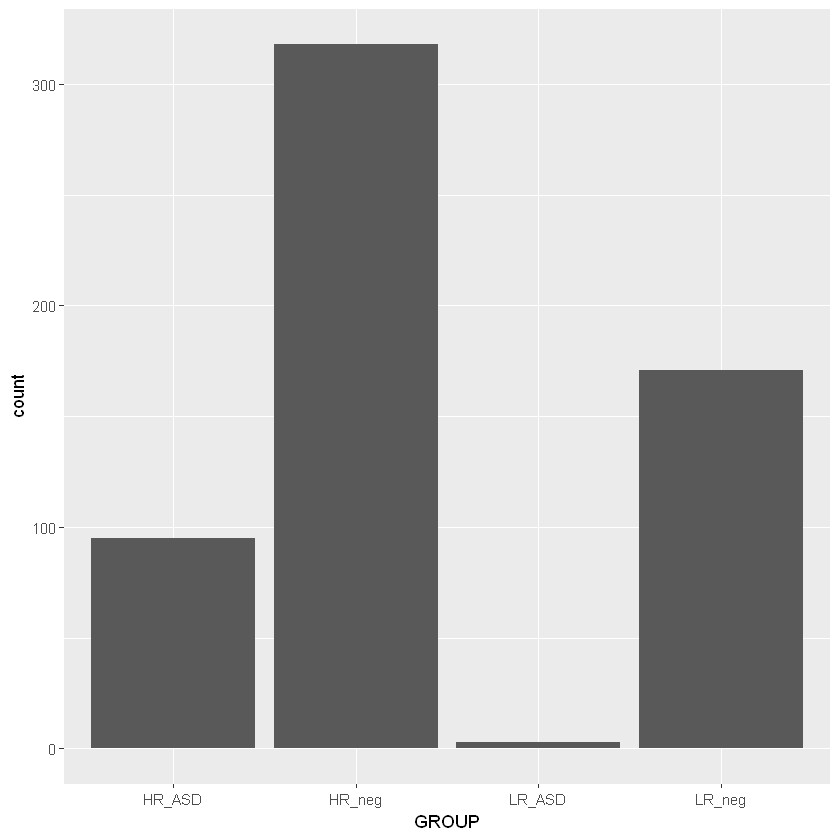

In [27]:
ggplot(data = data_aosi, aes(x = GROUP))+
    geom_bar()

Bien que l'on puisse vouloir visualiser les comptages de fréquence, on peut également créer un graphique similaire en utilisant une autre statistique. Cela met en évidence une fonctionnalité utile avec ggplot, chaque esthétique a également un argument `stat`, ainsi qu'une valeur par défaut pour cet argument.

Par conséquent, on peut spécifier la transformation statistique effectuée sur nos données à tracer en utilisant cet argument `stat`. Pour `geom_point()`, la valeur stat par défaut est `"identity"` et pour `geom_bar()` la valeur par défaut est "count". Ainsi, on n'aura souvent pas à spécifier cet argument.

Ces différentes transformations statistiques sont omises dans ce notebook, cependant ceux qui sont intéressés devraient lire [R for Data Science](https://r4ds.had.co.nz/) de Hadley Wickham pour plus d'informations et quelques exemples. L'exemple qui est couvert ici est le traçage des pourcentages de fréquence au lieu des comptages. Cela est fait en spécifiant `y=..prop..` et une valeur pour l'argument `group` dans la fonction `geom_bar()`. Voyons l'exemple ci-dessous des diagnostics de ASD par score total de AOSI.


Warning message:
"The dot-dot notation (`..prop..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(prop)` instead."


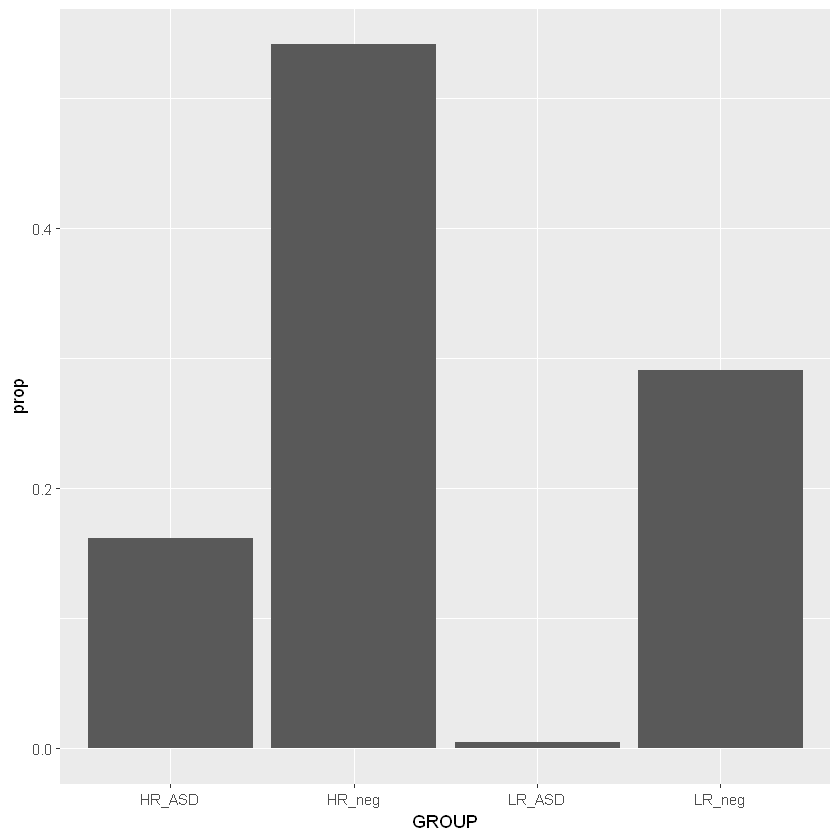

In [28]:
ggplot(data = data_aosi, aes(x = GROUP))+
    geom_bar(aes(y = ..prop.., group = 1))

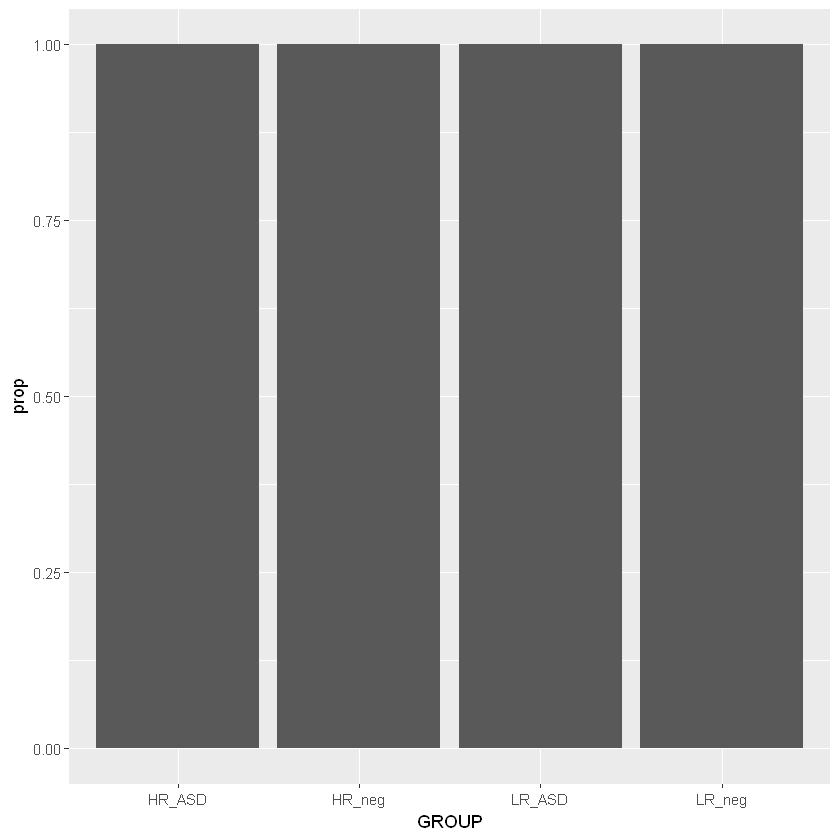

In [29]:
ggplot(data = data_aosi, aes(x = GROUP))+
    geom_bar(aes(y = ..prop.., group = GROUP))

Lorsque l'on trace les pourcentages de fréquence (ou proportions), on change essentiellement la variable calculée utilisée sur l'axe des y de comptage en pourcentage. Cela est fait en spécifiant `y=..prop..`, R comprend `..prop..` pour signifier "calculer la proportion de fréquence" même si cette variable n'est pas dans le jeu de données. On doit également indiquer à R comment calculer la proportion dans chaque valeur de x, c'est-à-dire **spécifier le "dénominateur".** Pour comparer à l'ensemble de l'échantillon, on utilise `group=1`. Comme exemple illustratif, remarquons ce qui se passe lorsque `group=GROUP` (rappelons que `GROUP` est la variable de diagnostic de ASD) est spécifié. Pourquoi cela s'est-il produit ?

Étant donné que nous avons vu de nombreux exemples d'utilisation des différents paramètres de traçage, essayez ceux discutés ainsi que ceux détaillés dans la [documentation de ggplot2](https://ggplot2.tidyverse.org/articles/ggplot2-specs.html#point). Comment se comportent-ils avec les diagrammes à barres par rapport aux autres esthétiques discutées ci-dessus ?



## 3.6) Autres esthétiques

Il existe de nombreuses autres esthétiques ggplot2 parmi lesquelles on peut choisir. On peut trouver des détails sur ces esthétiques supplémentaires sur [le site Web de ggplot2](https://ggplot2.tidyverse.org/), cependant les exemples ci-dessus sont probablement ceux que l'on utilisera lors de l'analyse des données. On a également maintenant suffisamment de connaissances pour apprendre à utiliser soi-même ces autres esthétiques.


Fin de partie I de la "Création de graphiques avec ggplot2", jusqu'à présent, tout notre code ggplot2 a été assez simple, généralement de la forme :

**<center>ggplot2(...)+
  aethestic_1(...)+
  aesthetic_2(...)</center>**

  
Bien sûr, on pourrait continuer à empiler les esthétiques, mais on voudrait ajouter des éléments à notre code ggplot qui affineront davantage notre graphique pour avoir autant de controle que nécessaire pour créer la représentation visuelle optimale des données, et c'est ce qu'on va essayer d'explorer dans la partie 2 prochainement...

Des Liens importants :

* [dplyr](https://github.com/Dahamey/R/blob/main/R%20%20-%20Fr/dplyr%20en%20R.ipynb)
* [la page de documentation de ggplot2](https://ggplot2.tidyverse.org/articles/ggplot2-specs.html#point)
* [R for Data Science](https://r4ds.had.co.nz/) 
* [le site Web de ggplot2](https://ggplot2.tidyverse.org/)

# Change Log

| Date (YYYY-MM-DD) | Version | Changé Par      | Description du Changement |
| ----------------- | ------- | -------------   | ----------------------- |
| 2023-11-12       | 1.0     | Younes Dahami   |  version initiale|
| 2024-05-08       | 1.1     | Younes Dahami   |  ajout de code|